# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
- Name — название игры 
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## План работы:
  - изучить и подготовить данные для исследования
  - провести исследовательский анализ данных
  - составить портрет пользователя для каждого региона
  - проверить гипотезы

## Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

df = pd.read_csv('C:/Users/Денис/Desktop/Проекты/Games/games.csv')

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df.info()
df[:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


При первичном просмотре, таблица выглядит достаточно корректно, на первый взгляд, нужно изменить название столбцов, а также разобраться с пропусками.

## Предобработка данных

### Что делаю:
  - привожу столбцы к нижнему регистру
  - образабываю пропуски и заменяю значения там, где это необходимо
  - преобразовываю данные в нужные типы
  - рассчитываю суммарные продажи во всех регионах
  - проверяю данные на наличие дублей

In [4]:
df.columns = df.columns.str.lower()
df[:3]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [5]:
#Для начала посмотрим общее количество пропусков в столбцах
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбцах name и genre всего по два пропуска, смело удаляем их. В столбце year_of_release их уже гораздо больше, однако относительно всего датасета их чуть более 1,5%, думаю от них мы тоже можем избавиться без угрызений совести.

In [6]:
df = df.dropna(subset=['name','genre','year_of_release'])

In [7]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце оценок пользователей, помимо значений и пропусков, также присутсвует аббревиатура tbd, в сфере компьтерных игр, она расшифровывается как Тo Be Determined, то есть "Будет определено", исходя из этого мы не можем поменять ее на какое-то конкретное значение, а потому за меним ее на NaN, как и пропуски.

In [8]:
df['user_score']=df['user_score'].replace('tbd', np.nan)

In [9]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Помимо рейтинговых значений в столбце также присутствуют пропуски, заменить их с привязкой по информации из данной таблицы мы определенно не сможем, но для того чтобы в дальнейшем не терять данные заменю их на unknown, также меня смущает тот факт, что по сути рейтингом К-А, первоначально назывался рейтинг Е, а потому предлагаю заменить К-А на Е, для дальнейшего удобства

In [10]:
df['rating'] = df['rating'].fillna('unknown')

In [11]:
df['rating'] = df['rating'].replace('K-A', 'E')

In [12]:
#проверка на замены
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
df = df.astype({'year_of_release': 'int64', 'critic_score': 'Int64'})
df['user_score'] = pd.to_numeric(df['user_score'], errors='ignore')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


### Расчет суммарных продаж во всех регионах

In [15]:
#рассчитаем суммарные продажи во всех регионах
df['total_sales'] = df.loc[:, 'na_sales': 'other_sales'].sum(axis=1)

In [16]:
df[:5]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38


### Проверка на дубликаты

In [17]:
df.duplicated().sum()

0

Поиск на очевидные дубликаты не дал результатов, приведем столбцы к единому регистру и проверим снова

In [18]:
columns_o = ['name', 'platform', 'genre']

for i in columns_o:
    df[i] = df[i].str.lower()
    
df.duplicated().sum()    

0

Проверим на неочивидные дубли по основным категориям

In [19]:
df[['name', 'platform', 'year_of_release', 'genre']].duplicated().sum()

1

Поиск дал один дубль, найдем его и посмотрим

In [20]:
duplicated_df = df[df[['name', 'platform', 'year_of_release', 'genre']].duplicated()]
duplicated_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16230,madden nfl 13,ps3,2012,sports,0.0,0.01,0.0,0.0,83,5.5,E,0.01


In [21]:
dupl = df.query('name == "madden nfl 13" and year_of_release == 2012 and genre == "sports" and platform == "ps3" ')

In [22]:
dupl

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83,5.5,E,2.56
16230,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83,5.5,E,0.01


Один из дублей оказался практически пустым, к тому же оценки и рейтинг у него совпадают, а потому просто избавимся от него

In [23]:
df = df.drop(index = 16230, axis = 0)

## Исследовательский анализ данных

### Что делаю:
  - группирую данные и смотрю распределение выпуска игр и выручки по годам, а также изменение продаж по платформам
  - определяю актуальный период
  - определяю потенциально прибыльные платформы
  - просмотрю распределение по глобальным продажам в разбивке по платформам
  - определяю влияние отзывов на продажи, а также распределение игр по жанрам

### Сгрупируем данные и посмотрим сколько игр выпускалось в разные годы

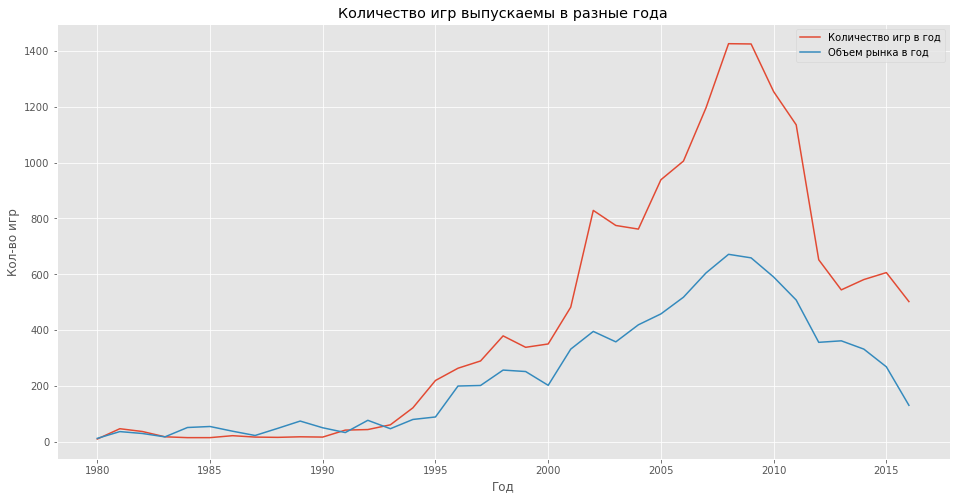

In [24]:
plt.style.use('ggplot')

df.groupby('year_of_release')['name'].count().plot(x= 'total_sales',
                                                    figsize = (16,8),
                                                    kind = 'line', 
                                                    label = 'Количество игр в год').legend()

df.groupby('year_of_release')['total_sales'].sum().plot(x= 'total_sales',
                                                    figsize = (16,8),
                                                    kind = 'line', label = 'Объем рынка в год').legend()

plt.title('Количество игр выпускаемы в разные года')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')

plt.show()

По значениям и графику видна тенденция увеличения количества выпускаемых игр начиная с 1994 года вплоть до 2008, после чего начался резкий спад. Очевидно, что нам не важны данные за весь период

### Изменение продаж по платформам в зависимости по годам

Найдем платформы с наибольшими суммарными продажами

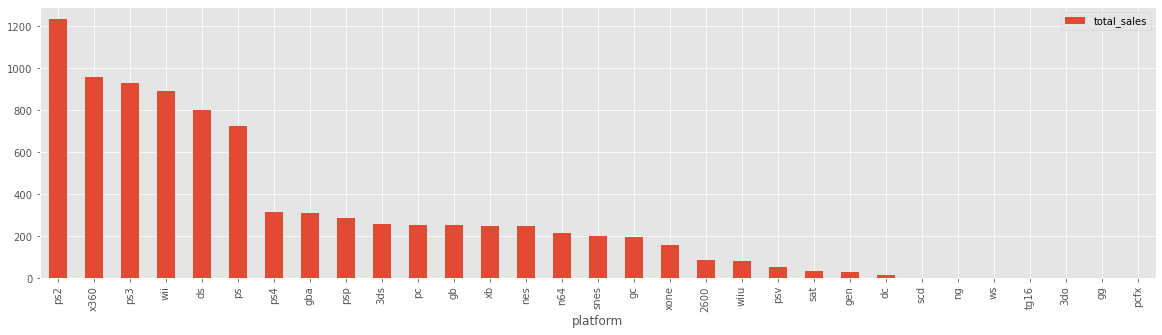

In [25]:
#для начала посмотрим на распределение продаж по платформам
df.pivot_table(index = 'platform'
                    , values = ['total_sales']
                    , aggfunc = 'sum').sort_values('total_sales',
                                                      ascending = False).plot(y = 'total_sales',
                                                                                       figsize = (20,5), kind = 'bar')
plt.show()

In [26]:
#ограничим до 10
top_10_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top_10_platform

platform
ps2     1233.56
x360     961.24
ps3      931.33
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
Name: total_sales, dtype: float64

Посмотрим распределение продаж по годам для всех платформ

<AxesSubplot:xlabel='year_of_release'>

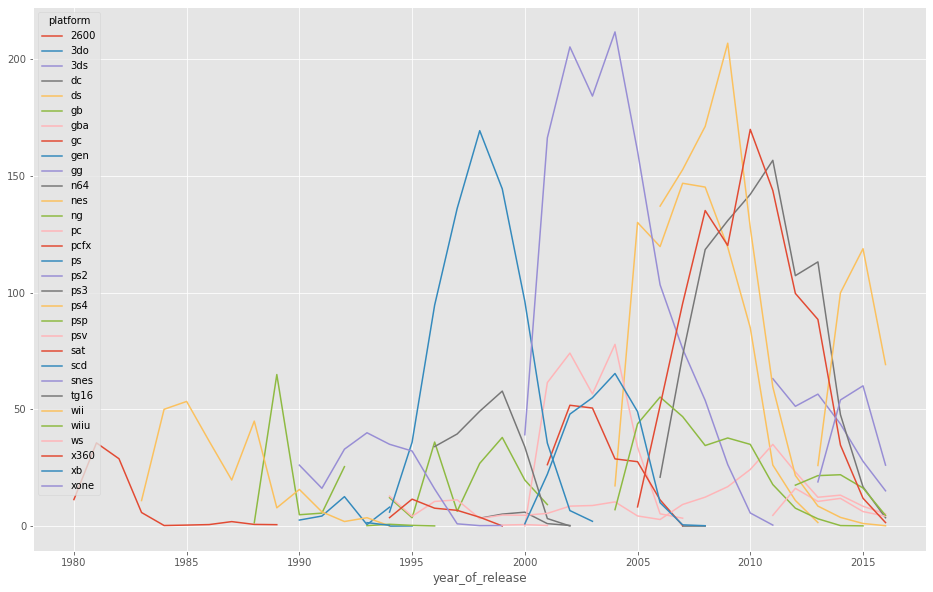

In [27]:
df.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(figsize=(16, 10))

И для топ-10

<AxesSubplot:xlabel='year_of_release'>

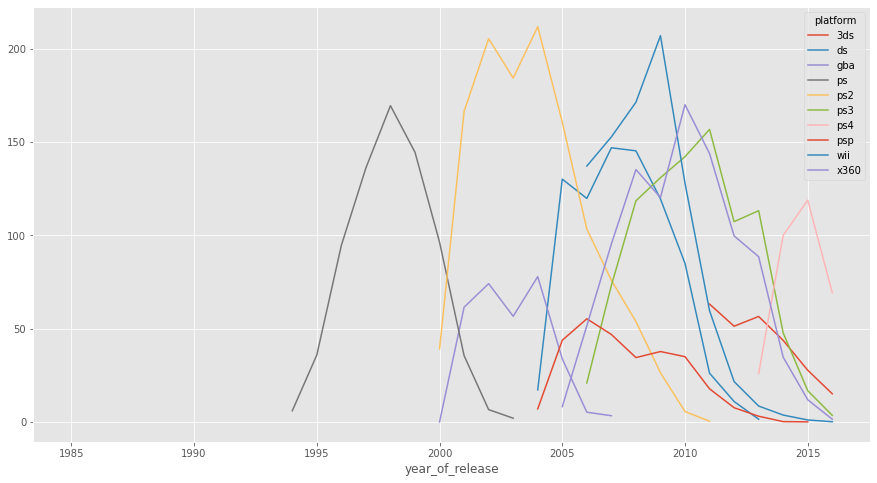

In [28]:
df_top_10_platform_sales = df[df['platform'].isin(top_10_platform.index)].pivot_table(index='year_of_release',
                                                                                columns = 'platform',
                                                                                values = 'total_sales',
                                                                                aggfunc = 'sum')

df_top_10_platform_sales.plot(kind='line', figsize=(15, 8))

Графики хоть и не привлекательные, однако по ним, можно сделать вывод, что в среднем платформы живут не очень долго порядка 5-7 лет, причем пиковые значения продаж на этих платформах держатся порядка 1-2 лет, пиковые значение наступают после 2-3 лет после запуска платформы, после достижения которых, продажи игр на этих платформах начинают падать, вероятно такую тенденцию, как и срок жизни платформы можно объяснить постоянным обновлением и усовершенствованием различных игровых платформ.

In [29]:
#найдем врямя жизни каждой платформы
df_plat = df.pivot_table(index='year_of_release', columns = 'platform',values = 'name', aggfunc = 'count')

total_rows = 37
for i in df_plat:
    counter = []
    row = total_rows - df_plat.isna().sum()
    counter.append(row)
    
counter

[platform
 2600    10
 3do      2
 3ds      6
 dc       7
 ds      11
 gb      13
 gba      8
 gc       7
 gen      5
 gg       1
 n64      7
 nes     12
 ng       4
 pc      26
 pcfx     1
 ps      10
 ps2     12
 ps3     11
 ps4      4
 psp     12
 psv      6
 sat      6
 scd      2
 snes    10
 tg16     1
 wii     11
 wiiu     5
 ws       3
 x360    12
 xb       9
 xone     4
 dtype: int64]

Из данных значений видно, что средняя продолжительность жизни платформы составяет примено 6,5 лет. Примечательно, что платформы, входящие в топ-10 продаж, имеют срок жизни около 10 лет.

### Определение актуального периода

Исходя из рассчитанных выше данных можно утверждать точно, данные до 2000 года вряд ли нам могут пригодиться, однако так же и нельзя считать 16 лет за актуальный период, хотя бы потому, что за это время может смениться 2, а то и 3 поколения консолей( о чем на как раз и говорит среднее время жизни). В добавок ко всему эта закономерность отлично прослеживается среди консолей с наивысшими продажами: в топ-10 все 4 поколения консоли 'ps'. Вспомним срок жизни самых продаваемых консолей, он составляет порядка 10 лет, как и период наибольшего выпуска игр и продаж(2005-2015 год). Однако если посмотреть на графики, тенденция выпускаемых игр после 2010 года резко пошла на спад и уже к 2012 их количество сократилось вдвое + ко всему большинство консолей из того же топа по графикам к моменту 2012-2014 годов изживают себя и им на замену приходят их более новые модели, новое поколение так сказать. А потому за актуальный период, предположу, что стоит взять период после 2013 года, когда "ажиотаж" прошел и количество выпускаемых игр стало примерно одинаково, как и продажи за эти года.

In [30]:
df_actually = df[df['year_of_release'] >= 2013].reset_index(drop=True)

In [31]:
df_actually[:5]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,<NA>,NaN,unknown,14.60
4,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


### Определение потенциально прибыльных платформ

In [32]:
pd.pivot_table(df_actually, index='platform', columns = 'year_of_release', values = 'total_sales', aggfunc='sum')

year_of_release,2013,2014,2015,2016
platform,,,,
3ds,56.57,43.76,27.78,15.14
ds,1.54,NaN,NaN,NaN
pc,12.38,13.28,8.52,5.25
ps3,113.25,47.76,16.82,3.60
ps4,25.99,100.00,118.90,69.25
psp,3.14,0.24,0.12,NaN
psv,10.59,11.90,6.25,4.25
wii,8.59,3.75,1.14,0.18
wiiu,21.65,22.03,16.35,4.60


В топе продаж у нас находятся две консоли серии ps и xbox, а также 3ds. Если не учитывать данные за неполный 2016 год , видно, что продажи на платформах более нового поколения ps и xbox растут, старого поколения, соответственно падают. Прожади на 3ds хоть и падают, однако даннам платформа также пользуется популярностью у пользователей. К потенциально прибыльным платформам стоит отнести ps4 и xone, к стабильным платформам 3ds, wiiu, pc.

### График по глобальным продажам игр в разбивке по платформам

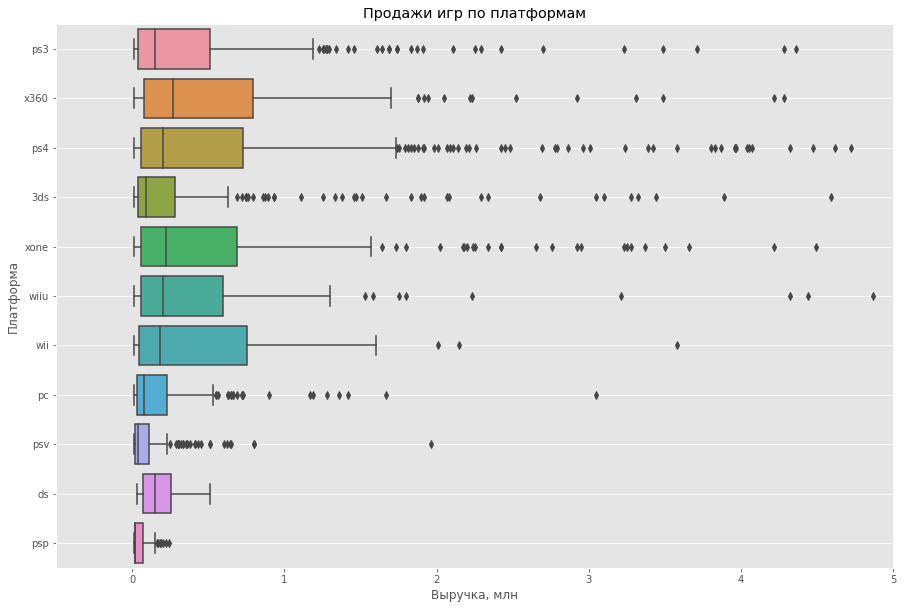

In [33]:
plt.figure(figsize=(15,10))

fig = sns.boxplot(y='platform',
                 x='total_sales',
                 data=df_actually,
                 orient='h')
fig.grid(which='both')
plt.title('Продажи игр по платформам')
plt.xlabel('Выручка, млн')
plt.ylabel('Платформа')
fig.set(xlim=(-0.5,5))
        
plt.show()

На всех платформах наблюдается одна схожая тенденция - очень большой размах, относительно медианного значения. Также практически на всех графиках присутствует большре количество выбросов. Эти выбросы, вероятно являются хитовыми играми, с большими продажами, именно такие игры, как правило, и приносят большую выручку.

### Влияние на продажи  отзывов пользователей и критиков внутри одной популярной платформы

In [34]:
#для дальнейшего удобства работы с оценками, а также для того, чтобы оценки были в одном диапазоне 
#разделим оценки критиков на 10

df_actually['critic_score'] = df_actually['critic_score']/10

В качестве самой популярной платформы для этого пункта возьмем ps4, как платформу с самыми большими продажами и большим потенциалом.

In [35]:
df_ps4 = df_actually.query("platform == 'ps4'").reset_index(drop=True)

In [36]:
df_ps4[:5]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
1,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,9.7,8.3,M,12.62
2,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,8.2,4.3,E,8.58
3,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,<NA>,NaN,unknown,7.98
4,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,8.3,5.7,M,7.66


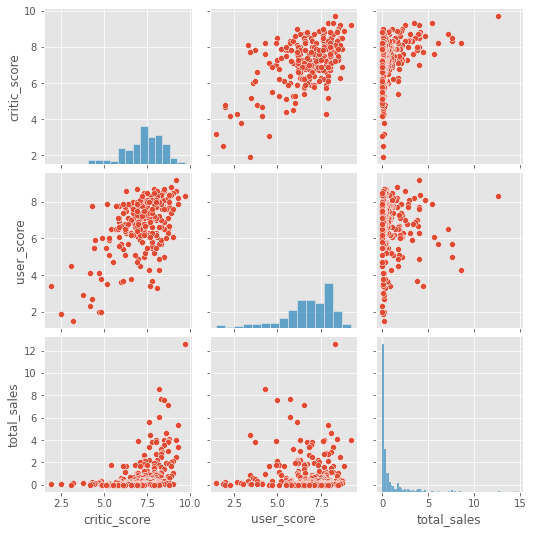

In [37]:
sns.pairplot(
    df_ps4,
    vars=df_ps4[['critic_score',
    'user_score', 
    'total_sales']],
    kind ='scatter')

По данным графика и результатам корреляции видно, что пользователи больше ориентирцются на оценку критиков, нежели на оценки других пользователей. И хотя зависимость не выглядит очень сильной, однако она нам говорит о том, что чем выше оценка критиков на игру, тем больше у нее продаж 

#### На других платформах

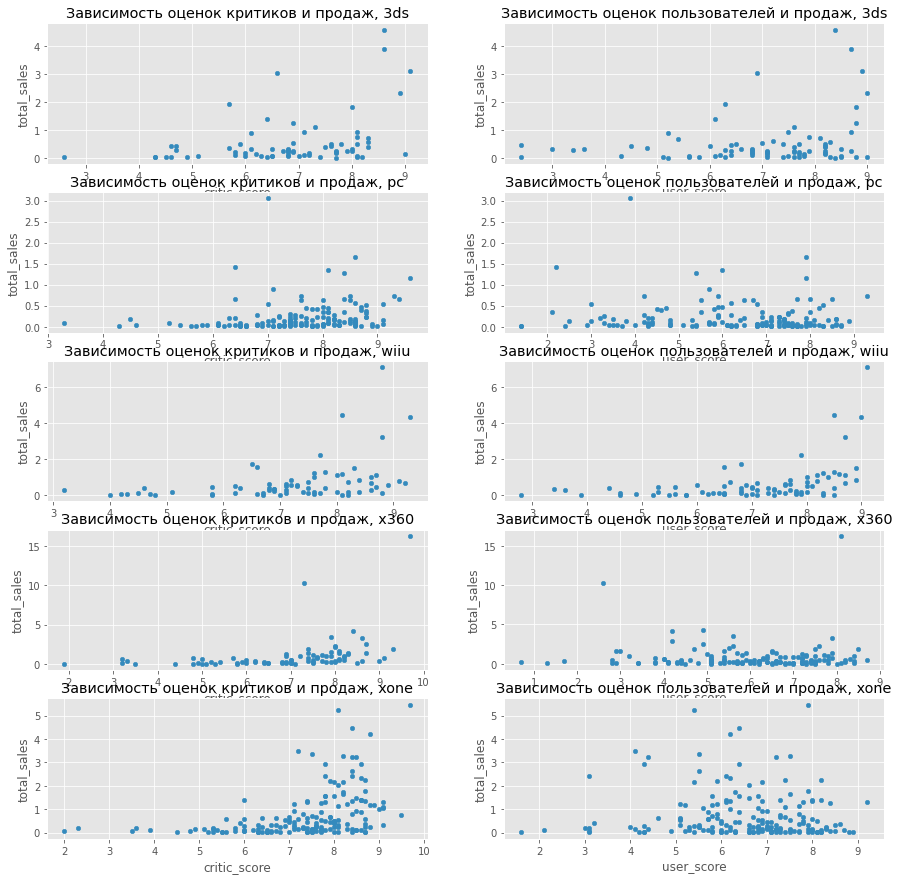

In [38]:
top_platform_list = ['3ds', 'wiiu', 'xone', 'pc', 'x360']
df_actually_top = df_actually[df_actually['platform'].isin(top_platform_list)]
#display(df_actually_top)

fig, axs = plt.subplots(5, 2, figsize=(15,15))
for i, platforms in enumerate(df_actually_top.groupby('platform')):
    platforms[1].plot(kind='scatter', x='critic_score', y='total_sales',
                      title = 'Зависимость оценок критиков и продаж, {}'.format(platforms[0]), alpha=1, ax=axs[i, 0])
    platforms[1].plot(kind='scatter', x='user_score', y='total_sales',
                      title = 'Зависимость оценок пользователей и продаж, {}'.format(platforms[0]), alpha=1, ax=axs[i, 1])

При просмотре топ-5 популярных консолей, вывод, сделанный нами ранее, подтверждается.

### Распределение игр по жанрам

,genre,name,total_sales
0,action,766,321.87
1,shooter,187,232.98
2,sports,214,150.65
3,role-playing,292,145.89
4,misc,155,62.82
5,platform,74,42.63
6,racing,85,39.89
7,fighting,80,35.31
8,adventure,245,23.64
9,simulation,62,21.76


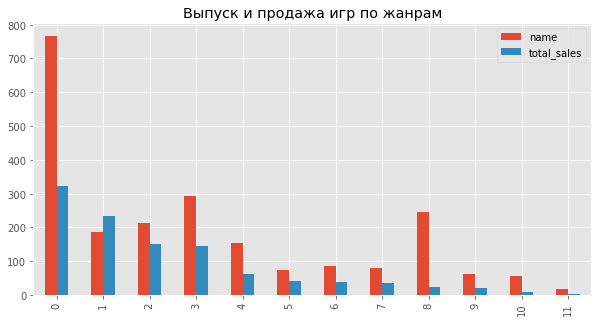

In [39]:
df_genre_2 = df_actually.groupby('genre').agg({"name" : 'count', 'total_sales' : 'sum' })
df_genre_2 = df_genre_2.sort_values(by = 'total_sales', ascending = False).reset_index()
df_genre_2.plot(title = 'Выпуск и продажа игр по жанрам', kind='bar', figsize=(10,5))
df_genre_2

По данным видно, что наибольшую выручку приносят активные игры с сюжетом( экшины, шутеры, ролевые). На фоне всех жанров явно выделяются по продажам action как жанр с самой высокой выручкой, а также puzzle, как жанр с самой низкой.

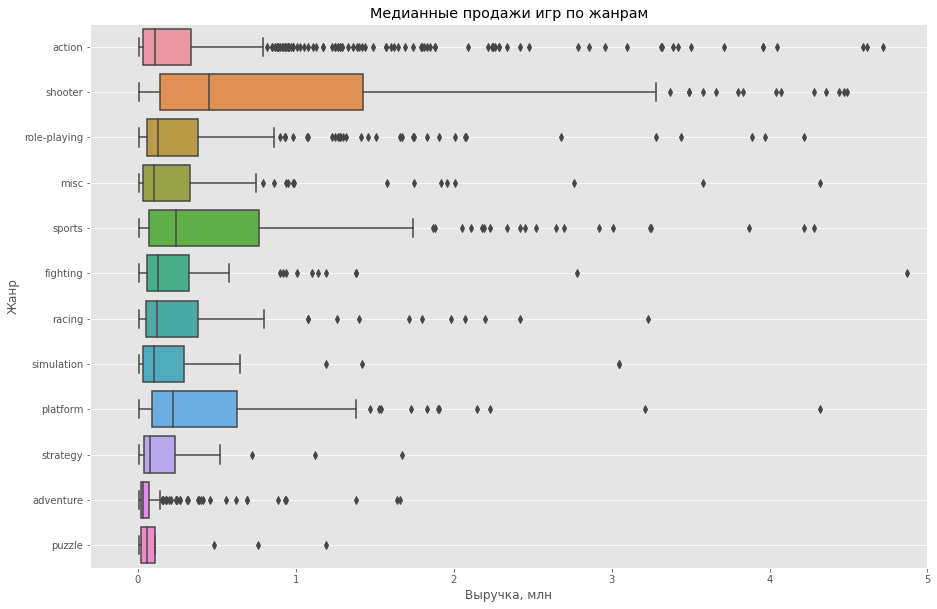

In [40]:
#посмотрим на распределение с другой стороны
df_genre_3 = df_actually.groupby('genre')["total_sales"].median().sort_values(ascending = False).reset_index()


plt.figure(figsize=(15,10))

fig = sns.boxplot(y='genre',
                 x='total_sales',
                 data=df_actually,
                 orient='h')
fig.grid(which='both')
plt.title('Медианные продажи игр по жанрам')
plt.xlabel('Выручка, млн')
plt.ylabel('Жанр')
fig.set(xlim=(-0.3,5))
        
plt.show()


Хотя и лидирующие позиции по жанрам не сильно поменялись, диаграмма размаха говорит нам об очень удивительной вещи - на многих платформах большие продажи делают именно выбросы, т.е. наиболее разрекламированные и/или ожидаемые игры аудиторией, что поделать, рынок, есть рынок.

## Составление портрета пользователя каждого региона

### Топ-5 платформ в каждом из регионов (NA, EU, JP)

In [41]:
#сгруппируем данные продаж по платформам по регионам в отдлеьную таблицу
platform_pivot = df_actually.pivot_table(index='platform', values =['na_sales','eu_sales', 'jp_sales'],
                                         aggfunc = 'sum').reset_index()

regions = ['na_sales','eu_sales', 'jp_sales']

for i in regions:
    platform_pivot[i] = platform_pivot[i]/(platform_pivot[i].sum())
    
platform_pivot[:5]

,platform,eu_sales,jp_sales,na_sales
0,3ds,0.078933,0.481674,0.087272
1,ds,0.002167,0.000000,0.001302
2,pc,0.064656,0.000000,0.025382
3,ps3,0.172883,0.165862,0.145073
4,ps4,0.359712,0.113368,0.248429


In [42]:
def graf(info):
    # создадим специальную таблицу через функцию melt() она позволит сделать названия столбцов значениями столбцов
    # это позволит сделать группировку на графике
    sales_region_genre_melt = pd.melt(df_actually, id_vars=[info], value_vars=['eu_sales', 'na_sales', 'jp_sales'])
    
    # переименуем колонки
    sales_region_genre_melt.columns = [info, 'region', 'sales']
    
    # заменим значения регионов в новой колонке 
    sales_region_genre_melt.replace({'eu_sales': 'Europe', 'jp_sales': 'Japan', 'na_sales': 'North America'}, inplace=True)
    
    plt.figure(figsize=(17,6))
    
    # построим столбчатый график, который отражает сумму значений
    sns.barplot(data = sales_region_genre_melt, x='region', y='sales', hue=info, estimator=sum)

    plt.xlabel('Регион')
    plt.ylabel('Продажи, млн. копий')

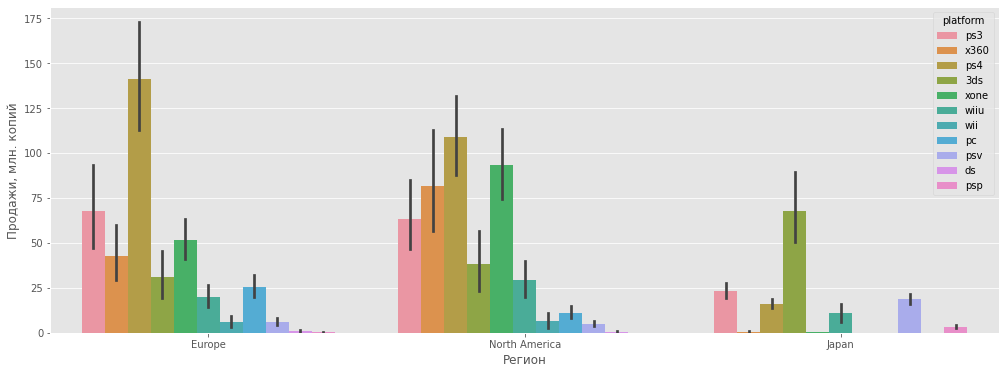

In [43]:
graf('platform')

Распределение по лучшим платформам актуального периода для каждого региона посмотрели, теперь посмотрим в разрезе топ-5. Для лучшей визуализации сделаем круговые диаграммы.

In [44]:
def circle(info):
    areas = ['eu_sales','jp_sales','na_sales']
    for i in areas:
        df_actually.pivot_table(index = info, values = [i],aggfunc = 'sum') \
                                   .sort_values([i], ascending = False).head() \
                                   .plot(y = i, wedgeprops=dict(width=0.3), shadow=True,kind = 'pie', rotatelabels=True,
                                   label = i, autopct='%1.0f%%').legend(bbox_to_anchor=(1.1, 1))

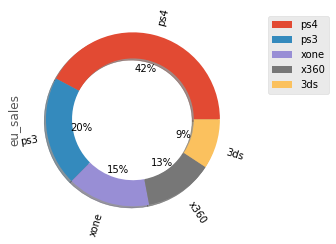

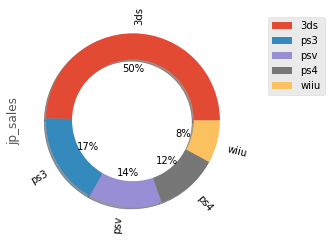

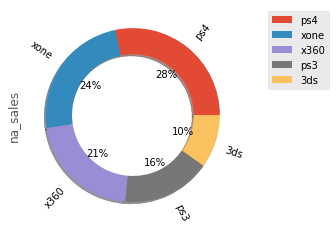

In [45]:
circle('platform')

Как видно из графика и по полученным раннее данным, что в Америке, что в Европе список из топ- 5 наиболее популярных концолей совпадает: ps3, ps4, x360, xone, 3ds. Различия лишь в том, какое место в этом топе занимают данные консоли, если в Европе преобладает линейка ps, то в Америке больше предпочитают консоли серии x. Куда интереснее обстоят дела в Японии, где топ- 5 состоит из 3ds, ps3, psv, ps4, wiiu, причем на лидирующей позиции консоль их собственного производства - 3ds, также пользуются популярностью консоли линейки ps. Ко всему прочему стоит отметить, что в топ-5 присутствуют две портативные консоли.

### Топ-5 жанров в каждом из регионов (NA, EU, JP)

In [46]:
#сгруппируем данные продаж по платформам по регионам в отдлеьную таблицу
genre_pivot = df_actually.pivot_table(index='genre', values =['na_sales','eu_sales', 'jp_sales'], aggfunc = 'sum').reset_index()

for i in regions:
    genre_pivot[i] = genre_pivot[i]/(genre_pivot[i].sum())
    
genre_pivot

,genre,eu_sales,jp_sales,na_sales
0,action,0.301175,0.287612,0.287976
1,adventure,0.021034,0.041341,0.016312
2,fighting,0.021798,0.054340,0.035526
3,misc,0.051092,0.065350,0.062804
4,platform,0.039722,0.034025,0.041443
5,puzzle,0.002550,0.008382,0.001896
6,racing,0.051475,0.016338,0.029609
7,role-playing,0.094256,0.362551,0.106006
8,shooter,0.224001,0.046953,0.250714
9,simulation,0.027841,0.032107,0.011103


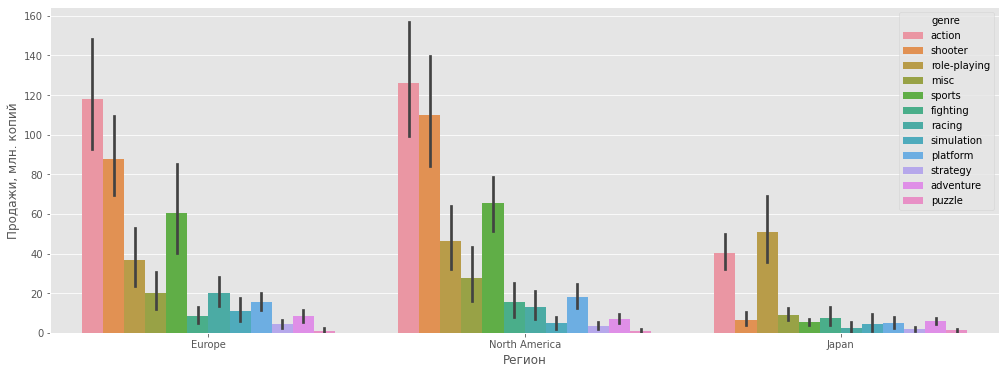

In [47]:
graf('genre')

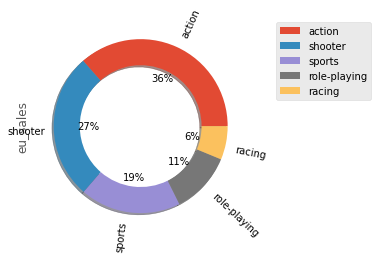

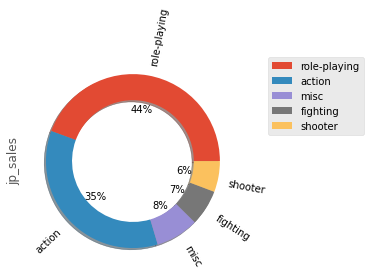

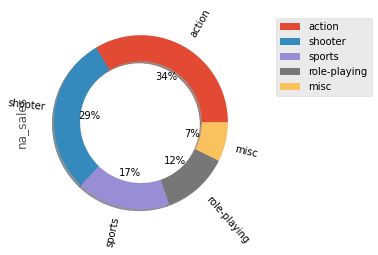

In [48]:
circle('genre')

По данным графика, а также полученным ранее результатам вкусы игроков из американского и европейского региона практически совпадают, самые популярные жанры в этих регионах: action, shooter, sports, role-playing, и если в Европе жанр, закрывающий топ-5 - racing, то в Америке - это misc. Куда интереснее в Японском регионе, где как таковой топ-5 довольно сложно составить, явно выделяются два жанра - action и role-playing, далее идут целых 7 жанров со схожими продажами - shooter, platform, misc, simulation, sports, adventure, fighting.

### Влияние рейтинга ESRB  на продажи

In [49]:
#сгруппируем данные продаж по платформам по регионам в отдлеьную таблицу
rating_pivot = df_actually.pivot_table(index='rating', values =['na_sales','eu_sales', 'jp_sales'], 
                                       aggfunc = 'sum').reset_index()

for i in regions:
    rating_pivot[i] = rating_pivot[i]/(rating_pivot[i].sum())
    
rating_pivot 

,rating,eu_sales,jp_sales,na_sales
0,E,0.212528,0.107544,0.180599
1,E10+,0.108839,0.041838,0.123918
2,M,0.370497,0.100227,0.377442
3,T,0.106953,0.146257,0.113751
4,unknown,0.201183,0.604134,0.204291


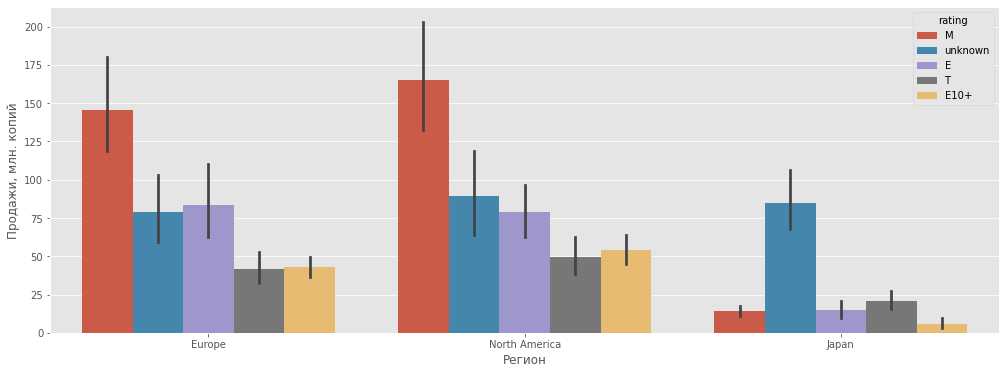

In [50]:
graf('rating')

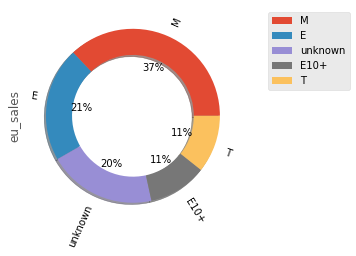

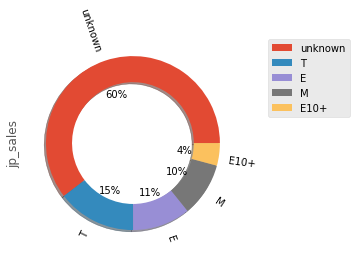

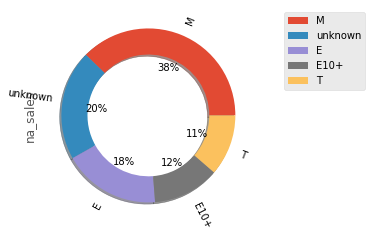

In [51]:
circle('rating')

Для того, чтобы лучше понять как влият рейтинг разберем, что значат буквы:
  - «M» («Mature») — «Для взрослых» 18+
  - «E» («Everyone») — «Для всех» 6+
  - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» 10+
  - «T» («Teen») — «Подросткам» 13+
  
Для японского региона сложно дать однозначный ответ, т.к. для более 50% проданных игр в этом регионе мы не знаем рейтинг, если исходить из тех данных, что у нас есть, распределение выглядит довольно равномерно, а потому влияние рейтинга минимально. 

Для европейского и американского региона заметно влияние рейтинга на продажи, по графикам и данным видно, что игры с рейтингом М и Е суммарно занимают 60% прoдаж от общего количества продаж во всем регионе, причем игры рейтинга М имеют около 40% доли рынка. 

## Проверка гипотез

### Гипотеза №1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую гипотезу: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Тогда в качестве альтернативной теории: "Средние пользовательские рейтинги платформ Xbox One и PC различные".

In [52]:
#Для начала удалим все пропуски в значениях оценки пользователей, для того, чтобы мы могли работать с тестами
df_actually_gip = df_actually.dropna()
df_actually_gip[:5]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,9.7,8.2,M,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,9.7,8.1,M,16.27
4,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,9.7,8.3,M,12.62
6,call of duty: ghosts,x360,2013,shooter,6.73,2.56,0.04,0.91,7.3,2.6,M,10.24
7,call of duty: ghosts,ps3,2013,shooter,4.10,3.63,0.38,1.25,7.1,2.6,M,9.36


In [53]:
#Выборка по каждой из платформ с оценкой рейтинга пользователя
xone = df_actually_gip.query("platform == 'xone'")['user_score'] 
pc = df_actually_gip.query("platform == 'pc'")['user_score']

print('Средний рейтинг для XOne:', xone.mean())
print('Средний рейтинг для PC:', pc.mean())

#задаем пороговое значение равное 5%
alpha = 0.05


results = st.ttest_ind(
   xone, 
   pc)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средний рейтинг для XOne: 6.538181818181819
Средний рейтинг для PC: 6.302027027027026
p-значение:  0.17306926618147322
Не получилось отвергнуть нулевую гипотезу


Исходя из результатов теста и средних значений, можно сделать вывод о том, что гипотеза подтвердилась, действительно, средний пользовательский рейтинг на данных платформах совпадает.

### Гипотеза №2. Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую гипотезу: "Средние пользовательские рейтинги жанров Action и Sports разные". Тогда в качестве альтернативной теории: "Средние пользовательские рейтинги жанров Action и Sports одинаковые".

In [54]:
#Выборка по каждому жарну с оценкой рейтинга пользователя
action = df_actually_gip.query("genre == 'action'")['user_score'] 
sports = df_actually_gip.query("genre == 'sports'")['user_score']

print('Средний рейтинг для Action:', action.mean())
print('Средний рейтинг для Sports:', sports.mean())

#задаем пороговое значение равное 5%
alpha = 0.05


results = st.ttest_ind(
   action, 
   sports)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средний рейтинг для Action: 6.936245954692556
Средний рейтинг для Sports: 5.665454545454544
p-значение:  1.684099430689953e-16
Отвергаем нулевую гипотезу


Результат теста нам говорит о том, что мы должны отвергнуть нулевую гипотезу и принять тот факт, что оценки пользователей для данных категорий игр одинаковые, однако просмотр средних значений для актуального периода, говорит нам о том, что оценки различаются более, чем на 1 бал, что достаточно много, вероятнее всего это связано с актуальным периодом, проверим гипотезу на всех данных.

Т.к. результаты прошлого теста предлагают нам отвергнуть гипотезу о том, что оценки разные, т.е. оценки далжны быть одинаковыми, проверим все данные. В качесве нулевой гипотезы предположим, что "средние пользовательские рейтинги жанров Action и Sports одинаковые", тогда в качестве альтернативной возьмем ей противоположную, т.е. "средние пользовательские рейтинги жанров Action и Sports разные".

In [55]:
#удалим все пропуски из исходной таблицы
df_gip = df.dropna()

In [56]:
#Выборка по каждому жарну с оценкой рейтинга пользователя
action = df_gip.query("genre == 'action'")['user_score'] 
sports = df_gip.query("genre == 'sports'")['user_score']

print('Средний рейтинг для Action:', action.mean())
print('Средний рейтинг для Sports:', sports.mean())

#задаем пороговое значение равное 5%
alpha = 0.05


results = st.ttest_ind(
   action, 
   sports)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средний рейтинг для Action: 7.099452554744521
Средний рейтинг для Sports: 7.099578947368424
p-значение:  0.9982550364798146
Не получилось отвергнуть нулевую гипотезу


Тест по всему массиву подтвердил результаты прошлого, а значит изначальная нулевая гипотеза, которую мы проверяли оказалась неверной, а потому отвергаем ее и говорим, что средние пользовательские оценки жанров Action и Sports одинаковые.

## Общий вывод

По ходу исследования была изучена статистика продаж игр, в различных регионах, на различных платформах. Определены факторы, которые могут влиять на продажу игр, а также составлены предпочтения игроков в зависимости от региона. Все эти факторы могут повлиять на составление рекламной компании на предстоящий год. Также были проверены две гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров Action и Sports разные", результаты которых предствлены по ходу работы.